In [5]:
#your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
#your code here
from google.colab import files
uploaded=files.upload()

Saving data - Sheet1.csv to data - Sheet1 (1).csv


In [11]:
#your code here
data=pd.read_csv('data - Sheet1.csv')
data


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


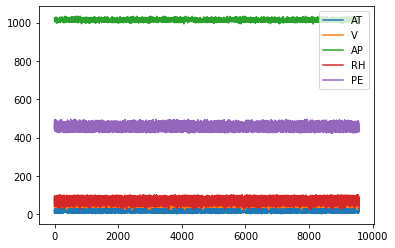

In [12]:
plt.plot(data)
plt.legend(["AT","V","AP","RH","PE"])

In [13]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [21]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.25, random_state=42)
scaler_x = StandardScaler()
scaler_y = StandardScaler()
train_x = scaler_x.fit_transform(train.iloc[:,:-1].values)
train_y = scaler_y.fit_transform(train.iloc[:,-1].values.reshape(-1,1))
val_x = scaler_x.transform(val.iloc[:,:-1].values)
val_y = scaler_y.transform(val.iloc[:,-1].values.reshape(-1,1))
test_x = scaler_x.transform(test.iloc[:,:-1].values)
test_y = scaler_y.transform(test.iloc[:,-1].values.reshape(-1,1))

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [23]:
net = Net()

# define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [25]:
for epoch in range(2000):
    optimizer.zero_grad()
    outputs = net(torch.Tensor(train_x))
    loss = criterion(outputs, torch.Tensor(train_y))
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        val_outputs = net(torch.Tensor(val_x))
        val_loss = criterion(val_outputs, torch.Tensor(val_y))
        print("Epoch: {}, Loss: {}, Validation Loss: {}".format(epoch, loss.item(), val_loss.item()))

Epoch: 0, Loss: 0.04733758419752121, Validation Loss: 0.055631764233112335
Epoch: 200, Loss: 0.0477137491106987, Validation Loss: 0.056083060801029205
Epoch: 400, Loss: 0.04703415930271149, Validation Loss: 0.05552566796541214
Epoch: 600, Loss: 0.04664517194032669, Validation Loss: 0.05538364127278328
Epoch: 800, Loss: 0.04659849777817726, Validation Loss: 0.05576063692569733
Epoch: 1000, Loss: 0.04626961052417755, Validation Loss: 0.05525946244597435
Epoch: 1200, Loss: 0.04631252586841583, Validation Loss: 0.05574225261807442
Epoch: 1400, Loss: 0.0462372712790966, Validation Loss: 0.055828895419836044
Epoch: 1600, Loss: 0.04589521139860153, Validation Loss: 0.055525459349155426
Epoch: 1800, Loss: 0.04586445912718773, Validation Loss: 0.05545135214924812


In [26]:
test_outputs = net(torch.Tensor(test_x))
print(test_outputs)
     

tensor([[ 0.2341],
        [-1.0957],
        [-1.1996],
        ...,
        [ 1.6284],
        [-1.1463],
        [ 0.1991]], grad_fn=<AddmmBackward0>)


In [27]:
test_loss = criterion(test_outputs, torch.Tensor(test_y))
print("Test Loss: {}".format(test_loss.item()))

Test Loss: 0.04912165552377701
